<a href="https://colab.research.google.com/github/alicenon/DemoAzureComputerVision/blob/main/DemoAzureComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Imágenes con Azure Computer Vision y Python
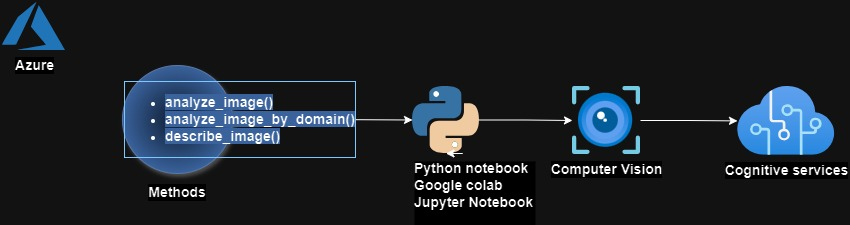


##Explicación de la arquitectura a pequeños rasgos


1.   **Instalación** y configuración de bibliotecas: Se instala la biblioteca `azure-cognitiveservices-vision-computervision` y se importan los módulos necesarios.
2.   **Autenticación**: Se configuran las credenciales necesarias para autenticar el cliente de Computer Vision.
3.   **Análisis de imágenes**:

    *   **`analyze_image()`**: Analiza una imagen especificada por una URL y extrae etiquetas con una confianza superior al 75%.
    *   **`analyze_image_by_domain()`**: Analiza imágenes para dominios específicos como lugares famosos
    *   **`describe_image()`**: Obtiene descripciones de texto para una imagen.









In [ ]:
!pip install azure-cognitiveservices-vision-computervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

In [ ]:
import os

Credenciales que necesitamos buscar en el portal de azure

In [ ]:
region="East US"
key = "99bc4d99b0f14d71bc2763ccbf656202"
name_r = "cvdemoalejandro1"

In [ ]:
credentials = CognitiveServicesCredentials(key)

In [ ]:
client = ComputerVisionClient(
    endpoint = "https://"+name_r+".cognitiveservices.azure.com/",
    credentials = credentials
)

In [ ]:
url = "https://diariocorreo.pe/resizer/YMz0qJexwiqCPP2wQdC-aFTZHvo=/1200x1200/smart/filters:format(jpeg):quality(75)/arc-anglerfish-arc2-prod-elcomercio.s3.amazonaws.com/public/ARGCX3RZPJAOJFC4R4DAEYYX5A.jpeg"

**metodo `analyze_image()`**


*   `url`: La URL de la imagen que se va a analizar.
*   `visual_features`: Especifica que queremos extraer las etiquetas (tags) y     descripciones (description) de la imagen.
*   `language`: Especifica que queremos los resultados en español ("es").





In [ ]:
try:
  # Analyze the image
  imagen_analysis = client.analyze_image(url, visual_features=[VisualFeatureTypes.tags], language="es")
  for tag in imagen_analysis.tags:
    # imprime las etiquetas con una confianza superior al 75%
    if tag.confidence > 0.75:
      print(tag.name, tag.confidence)
except:
  print("/Error")

pasto 0.9988921880722046
exterior 0.9981688261032104
árbol 0.9660711884498596
puesto 0.9176065921783447
animal 0.8754191398620605
planta 0.8730990886688232
mamíferos 0.7540345191955566


**Analizar imagenes por dominio:**

*   Personas famosas (celebrities)
*   Lugares famosos (landmarks)

Obtenemos la lista por dominios

In [ ]:
modelos = client.list_models()

for modelo in modelos.models_property:
    print(modelo)

{'additional_properties': {}, 'name': 'celebrities', 'categories': ['people_', '人_', 'pessoas_', 'gente_']}
{'additional_properties': {}, 'name': 'landmarks', 'categories': ['outdoor_', '户外_', '屋外_', 'aoarlivre_', 'alairelibre_', 'building_', '建筑_', '建物_', 'edifício_']}


**Analizar una imagen por dominio**

 - `analyze_image_by_domain` es otro método disponible de la clase `ComputerVisionClient` de Azure Cognitive Services o Azure AI Service.

 - permite a los usuarios aplicar análisis de imagen utilizando modelos preentrenados para dominios específicos.

In [ ]:
dominio, url, language = "landmarks", "https://upload.wikimedia.org/wikipedia/commons/5/54/Cristo_de_la_Concordia_02.jpg", "es"
print(dominio, url, language)
analysis = client.analyze_image_by_domain(dominio, url, language)
for x in analysis.result["landmarks"]:
  print(x["name"])
  print(x["confidence"])

landmarks https://upload.wikimedia.org/wikipedia/commons/5/54/Cristo_de_la_Concordia_02.jpg es
Cristo de la Concordia
0.9999628067016602


**Describir una imagen**

Puede obtener una descripción de texto basada en un idioma de una imagen con `describe_image`

In [ ]:
dominio = "landmarks"
url = "https://upload.wikimedia.org/wikipedia/commons/5/54/Cristo_de_la_Concordia_02.jpg"
language = "es"
max_descriptions = 4
analysis = client.describe_image(url, max_descriptions, language)
for x in analysis.captions:
  print("texto:", x.text)
  print("confianza: {}%".format(round(x.confidence, 2)))

texto: un avión de guerra volando en el cielo con Cristo de la Concordia de fondo
confianza: 0.39%
texto: avión de guerra volando en el cielo con Cristo de la Concordia de fondo
confianza: 0.39%
texto: avión militar volando en el cielo con Cristo de la Concordia de fondo
confianza: 0.39%
texto: una avión militar volando en el cielo con Cristo de la Concordia de fondo
confianza: 0.38%
